###Open file and initiate variables

In [1]:
import glob
import os
import csv
import zipfile
import StringIO

s_root = "C:/Users/Vera"
s_root = "/Users/ucaiado"
s_name = s_root + "/Dropbox/NEUTRINO/ALGO/DATA/pisa2012.csv.zip"
s_dict = s_root + "/Dropbox/NEUTRINO/ALGO/DATA/pisadict2012.csv"

###Create a function to read the file and read the file labels

In [2]:
import pandas as pd

In [3]:
df_labels = pd.read_csv(s_dict)
df_labels.columns=["VAR","DESCRIPTION"]

In [4]:
df_labels.head(5)

,VAR,DESCRIPTION
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code


In [5]:
import csv
import zipfile

def _getFields(l_fields, row):
    '''
    Return a dictionary with the data into the row, filtering 
    the fields passed 
    '''
    return {k: row.get(k, None) for k in l_fields}

def getData(s_file, l_fields):
    '''
    Return a list of dictionaries with the data desired
    '''
    with open(s_file, 'rb') as f1:
        zfile = zipfile.ZipFile(f1)
        l_rtn = []
        with zfile.open(zfile.filelist[0].filename) as f:
            reader = csv.DictReader(f)
            for idx, row in enumerate(reader):
                #count lines processed
                if idx%50000==0: print "estou na linha {}".format(idx)
                #get data desired
                l_rtn.append(_getFields(l_fields, row))
        print "estou na linha {}".format(idx)
        
    return l_rtn    

In [9]:
l_test = list(df_labels.head(5).VAR)
%time d_data = getData(s_name, l_test)

estou na linha 0
estou na linha 50000
estou na linha 100000
estou na linha 150000
estou na linha 200000
estou na linha 250000
estou na linha 300000
estou na linha 350000
estou na linha 400000
estou na linha 450000
estou na linha 485489
CPU times: user 2min 25s, sys: 1.09 s, total: 2min 26s
Wall time: 2min 27s


###let's see the countries names

In [40]:
df_country =  pd.DataFrame(d_data)

In [44]:
df_country.head()

,CNT,NC,OECD,STRATUM,SUBNATIO
0,Albania,Albania,Non-OECD,ALB0006,0080000
1,Albania,Albania,Non-OECD,ALB0006,0080000
2,Albania,Albania,Non-OECD,ALB0006,0080000
3,Albania,Albania,Non-OECD,ALB0006,0080000
4,Albania,Albania,Non-OECD,ALB0006,0080000


In [76]:
b=[x.strip() for x in df_country.CNT.unique()]
a=[x.strip() for x in df_country.NC.unique()]

In [79]:
[x for  x in a if x not in b]

['United Kingdom (excl.Scotland)',
 'United Kingdom (Scotland)',
 'Republic of Korea',
 'China (Shanghai)',
 'Perm (Russian Federation)',
 'Viet Nam']

In [78]:
[x for  x in b if x not in a]

['United Kingdom',
 'Korea',
 'China-Shanghai',
 'Perm(Russian Federation)',
 'Florida (USA)',
 'Connecticut (USA)',
 'Massachusetts (USA)',
 'Vietnam']

###I like more the CNT names. I will make just some changes

In [6]:
l_test = ["CNT","SUBJECT"]
%time d_data = getData(s_name, l_test)

estou na linha 0
estou na linha 50000
estou na linha 100000
estou na linha 150000
estou na linha 200000
estou na linha 250000
estou na linha 300000
estou na linha 350000
estou na linha 400000
estou na linha 450000
estou na linha 485489
CPU times: user 2min 21s, sys: 794 ms, total: 2min 22s
Wall time: 2min 22s


In [82]:
df =  pd.DataFrame(d_data)
b=[x.strip() for x in df.CNT.unique()]
d_newNames = dict(zip(b,b))
d_newNames["United Arab Emirates"] = "UAE"
d_newNames["United Kingdom"] = "UK"
d_newNames["Serbia"] = "Serbia"
d_newNames["Korea"] = "South Korea"
d_newNames["Chinese Taipei"] = "Taiwan"
d_newNames["Slovak Republic"] = "Slovakia"
d_newNames["Russian Federation"] = "Russia"
d_newNames["Perm(Russian Federation)"] = "Russia"
d_newNames["Hong Kong-China"] = "Hong Kong"
d_newNames["China-Shanghai"] = "China"
d_newNames["Macau"] = "Macau"
d_newNames["Connecticut (USA)"] = "USA"
d_newNames["Florida (USA)"] = "USA"
d_newNames["Massachusetts (USA)"] = "USA"
d_newNames["United States of America"] = "USA"
df.CNT1 = None
df.CNT1 = df.CNT.apply(lambda x: d_newNames[x])

In [11]:
print "Number of Rows: {}".format(df.shape[0])
print "Number of Countries in the dataset: {}".format(len(df.CNT.unique()))

Number of Rows: 485490
Number of Countries in the dataset: 64


###Also, I would like to use Gini Index in my visualizations...maybe I could change the color of the countries by it

Here is how it would be done in R
<code>
    > repGINI = vars %>%
    +         group_by(CNT, SUBJECT) %>%
    +         summarise_each(funs(Gini( (./sum(.)) * SCORE)), 
    +                        contains('W_FSTR')) %>%
    +         melt(id=c('CNT', 'SUBJECT'), variable.name='REPNAME', 
    +              value.name='GINI')
</code>

Think better, I will calculate it using R.... I guess that it would be faster.

In [44]:
l_test = ["CNT","SUBNATIO","STRATUM","OECD","NC","SCHOOLID","STIDSTD","PV1MATH","PV2MATH","PV3MATH","PV4MATH","PV5MATH","PV1READ","PV2READ","PV3READ","PV4READ","PV5READ","PV1SCIE","PV2SCIE","PV3SCIE","PV4SCIE","PV5SCIE","W_FSTUWT"]
%time d_data = getData(s_name, l_test)

estou na linha 0
estou na linha 50000
estou na linha 100000
estou na linha 150000
estou na linha 200000
estou na linha 250000
estou na linha 300000
estou na linha 350000
estou na linha 400000
estou na linha 450000
estou na linha 485489
CPU times: user 2min 21s, sys: 3.59 s, total: 2min 25s
Wall time: 2min 25s


In [45]:
df =  pd.DataFrame(d_data)

In [36]:
df.head()

,CNT,NC,OECD,PV1MATH,PV1READ,PV1SCIE,PV2MATH,PV2READ,PV2SCIE,PV3MATH,...,PV4READ,PV4SCIE,PV5MATH,PV5READ,PV5SCIE,SCHOOLID,STIDSTD,STRATUM,SUBNATIO,W_FSTUWT
0,Albania,Albania,Non-OECD,406.8469,249.5762,None,376.4683,254.342,408.84,344.5319,...,175.7053,367.8105,381.9209,218.5981,392.9877,0000001,00001,ALB0006,0080000,8.9096
1,Albania,Albania,Non-OECD,486.1427,406.2936,None,464.3325,349.8975,471.5964,453.4273,...,369.7553,443.6218,476.0165,396.7618,454.8116,0000001,00002,ALB0006,0080000,8.9096
2,Albania,Albania,Non-OECD,533.2684,401.21,None,481.0796,404.3872,428.7952,489.6479,...,431.3938,512.7191,533.2684,401.21,499.6643,0000001,00003,ALB0006,0080000,8.4871
3,Albania,Albania,Non-OECD,412.2215,547.363,None,498.6836,481.4353,481.574,415.3373,...,425.0393,474.1141,454.2842,471.9036,426.5573,0000001,00004,ALB0006,0080000,8.4871
4,Albania,Albania,Non-OECD,381.9209,311.7707,None,328.1742,141.7883,275.774,403.7311,...,272.8495,403.5248,395.1628,260.1405,422.1746,0000001,00005,ALB0006,0080000,8.4871


In [38]:
len(df.ix[:,['CNT', 'SUBNATIO', 'STRATUM', 'OECD', 'NC','SCHOOLID', 'STIDSTD', 'W_FSTUWT']].values)

485490

In [39]:
len(df.index)

485490

In [46]:
df_aux = df.copy()

In [48]:
df.index = [df.CNT, df.SUBNATIO, df.STRATUM, df.OECD, df.NC, df.SCHOOLID, df.STIDSTD, df.W_FSTUWT]

In [49]:
df.drop(['CNT', 'SUBNATIO', 'STRATUM', 'OECD', 'NC','SCHOOLID', 'STIDSTD', 'W_FSTUWT'], inplace=True, axis=1)

In [51]:
df_aux = df.stack()

In [52]:
df_aux.shape

(7282350,)

###Wait a minute... this Gini coefficient is about inequality in the Data...not economically. Let's do it in another way. I want the GDP per capita from this countries...in 2012

I found a source about GDP in OCDE website...nice. The data is in dollars.

In [368]:
s_gdp = "data/OCDE_GDP_percapta.csv"

In [369]:
df_gdp = pd.read_csv(s_gdp, sep = "\t")
df_gdp.tail()

,country,Year,Source,Year of reference,Per capita GDP
96,Tunisia,PISA 2012,c,2010,9409.766550
97,United Arab Emirates,PISA 2012,d,2010,46915.900070
98,Uruguay,PISA 2012,c,2010,14003.932110
99,Viet Nam,PISA 2012,c,2010,4097.937464
100,Liechtenstein,PISA 2012,c,2010,NaN


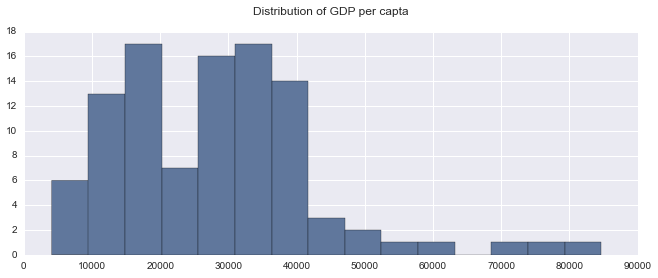

In [370]:
ax = df_gdp["Per capita GDP"].hist(bins = 15);
ax.set_title("Distribution of GDP per capta\n");

###Ok, I'm not sure if it is what I want. I would like to stratify people into social status. Let's see how is distributed the feature _ESCS_, that is about Index of economic, social and cultural status

In [264]:
l_test = ["CNT","ESCS","STIDSTD","PV1MATH","PV1READ","PV1SCIE","BELONG", "OUTHOURS", "ST28Q01", "ST57Q01"]
%time d_data = getData(s_name, l_test)

estou na linha 0
estou na linha 50000
estou na linha 100000
estou na linha 150000
estou na linha 200000
estou na linha 250000
estou na linha 300000
estou na linha 350000
estou na linha 400000
estou na linha 450000
estou na linha 485489
CPU times: user 2min 19s, sys: 599 ms, total: 2min 19s
Wall time: 2min 19s


In [267]:
df = pd.DataFrame(d_data)

In [268]:
df.head()

,BELONG,CNT,ESCS,OUTHOURS,PV1MATH,PV1READ,PV1SCIE,ST28Q01,ST57Q01,STIDSTD
0,-1.18,Albania,NA,NA,406.8469,249.5762,341.7009,0-10 books,NA,00001
1,NA,Albania,NA,8,486.1427,406.2936,548.9929,201-500 books,NA,00002
2,NA,Albania,NA,24,533.2684,401.21,499.6643,More than 500 books,NA,00003
3,NA,Albania,NA,17,412.2215,547.363,438.6796,11-25 books,10,00004
4,2.63,Albania,NA,NA,381.9209,311.7707,361.5628,101-200 books,NA,00005


In [276]:
df.ST57Q01[df.ST57Q01=="NA"]=None
df.ST57Q01 = df.ST57Q01.astype(float)

In [234]:
df.ESCS[df.ESCS=="NA"]=None
df.ESCS = df.ESCS.astype(float)

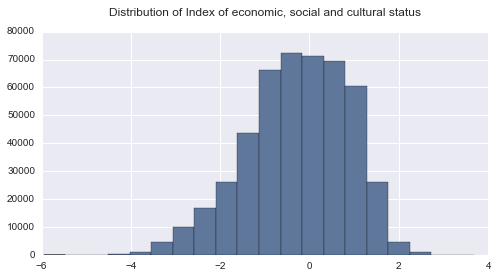

In [88]:
ax = df.ESCS.hist(bins = 20);
ax.set_title("Distribution of Index of economic, social and cultural status\n");

###Curious.... how it is correlated with Math scores? And how the scores are distributed?

In [235]:
df.PV1MATH = df.PV1MATH.astype(float)

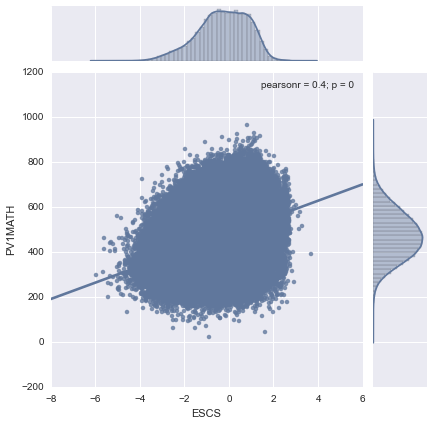

In [90]:
g = sns.jointplot("ESCS", "PV1MATH", data=df, kind="reg",
 size=6)

Curious....the Math Score has a bell-nice-looking shape

###There is too much data here.... I don't know if I can plot all this data using D3. Maybe I should group it in some way....Besides that, This chart is too cluttered....

###Know what....let's see if I just classify each point by its country's GDP per capta. First, I need to identify the GDP for each country

what countries from the dataset does not appear in GDP dataframe

In [371]:
df_gdp = df_gdp.loc[df_gdp["Year"]=="PISA 2012"]

In [372]:
l = [x for x in list(df.CNT) if x not in  list(df_gdp.country)] 

In [373]:
set(l)

{'China-Shanghai',
 'Connecticut (USA)',
 'Florida (USA)',
 'Hong Kong-China',
 'Macao-China',
 'Massachusetts (USA)',
 'Norway',
 'Perm(Russian Federation)',
 'United States of America',
 'Vietnam'}

Now, what is in GDP dataset that does not appear in my dataset

In [239]:
l = [x for x in  list(df_gdp.country) if x not in   list(df.CNT)] 
set(l)

{'Cyprus2, 3',
 'Hong Kong - China',
 'Macao - China',
 'Norway1',
 'OECD average',
 'Shanghai - China',
 'United States',
 'Viet Nam'}

Ok...let's map what is missing

In [374]:
def rename_contries(l_names):
    """
    rename the name of each string in a list by names pre-selected
    inside the function. Return a new list with the names modifieds
    """
    set_names = set(l_names)
    b=[x.strip() for x in set_names]
    d_newNames = dict(zip(b,b))
    l2 = ["UAE", "UK", "Serbia", "South Korea", "Taiwan", "Slovakia", "Russia", 
          "Russia", "Hong Kong","China", "Macau", "USA", "USA","USA", "USA",
          "Vietnam", "Macau", "Hong Kong","China", "Norway", "USA","Macau"]
    
    l1 = ["United Arab Emirates","United Kingdom","Serbia","Korea","Chinese Taipei",
          "Slovak Republic","Russian Federation","Perm(Russian Federation)",
          "Hong Kong-China", "China-Shanghai","Macau","Connecticut (USA)","Florida (USA)",
          "Massachusetts (USA)", "United States of America", "Viet Nam", "Macao - China",
         "Hong Kong - China", "Shanghai - China", "Norway1", 'United States', 'Macao-China']
    for s1, s2 in zip(l1,l2):
        if s1 in set_names:
           d_newNames[s1] = s2
    
    l_rtn = [d_newNames[x] for x in l_names] 
    return l_rtn



In [375]:
df["CNT1"] = None
df.head()

,BELONG,CNT,ESCS,OUTHOURS,PV1MATH,PV1READ,PV1SCIE,ST28Q01,ST57Q01,STIDSTD,ST57Q01_bk,ESCS_bk,ESCS_bk2,CNT1
0,-1.18,Albania,NaN,NA,406.8469,249.5762,341.7009,0-10 books,NaN,00001,NaN,NaN,NaN,None
1,NA,Albania,NaN,8,486.1427,406.2936,548.9929,201-500 books,NaN,00002,NaN,NaN,NaN,None
2,NA,Albania,NaN,24,533.2684,401.21,499.6643,More than 500 books,NaN,00003,NaN,NaN,NaN,None
3,NA,Albania,NaN,17,412.2215,547.363,438.6796,11-25 books,10,00004,"(8, 10]",NaN,NaN,None
4,2.63,Albania,NaN,NA,381.9209,311.7707,361.5628,101-200 books,NaN,00005,NaN,NaN,NaN,None


In [376]:
df["CNT1"] = rename_contries(list(df.CNT))

In [377]:
df.head()

,BELONG,CNT,ESCS,OUTHOURS,PV1MATH,PV1READ,PV1SCIE,ST28Q01,ST57Q01,STIDSTD,ST57Q01_bk,ESCS_bk,ESCS_bk2,CNT1
0,-1.18,Albania,NaN,NA,406.8469,249.5762,341.7009,0-10 books,NaN,00001,NaN,NaN,NaN,Albania
1,NA,Albania,NaN,8,486.1427,406.2936,548.9929,201-500 books,NaN,00002,NaN,NaN,NaN,Albania
2,NA,Albania,NaN,24,533.2684,401.21,499.6643,More than 500 books,NaN,00003,NaN,NaN,NaN,Albania
3,NA,Albania,NaN,17,412.2215,547.363,438.6796,11-25 books,10,00004,"(8, 10]",NaN,NaN,Albania
4,2.63,Albania,NaN,NA,381.9209,311.7707,361.5628,101-200 books,NaN,00005,NaN,NaN,NaN,Albania


In [378]:
df_gdp["country1"] = None
df_gdp["country1"] = rename_contries(list(df_gdp.country))
df_gdp.head()


,country,Year,Source,Year of reference,Per capita GDP,country1
35,Australia,PISA 2012,b,2010,40801.34357,Australia
36,Austria,PISA 2012,b,2010,40410.79897,Austria
37,Belgium,PISA 2012,b,2010,37877.85105,Belgium
38,Canada,PISA 2012,b,2009,40135.59065,Canada
39,Chile,PISA 2012,b,2011,17311.55842,Chile


In [379]:
df_gdp.index = list(df_gdp.country1)

In [246]:
l = [x for x in  list(df_gdp.country1) if x not in   list(df["CNT1"])] 
set(l)

{'Cyprus2, 3', 'OECD average'}

In [247]:
l = [x for x in list(df["CNT1"]) if x not in  list(df_gdp.country1)] 
set(l)

set()

Nice...all cleaned. Let's insert the GDP per capta to each country

In [248]:
df["perCaptaGDP"]=None

In [249]:
df["perCaptaGDP"]=None
df["perCaptaGDP"] = list(df_gdp.loc[df["CNT1"]]["Per capita GDP"].values)
df.head()

,BELONG,CNT,ESCS,OUTHOURS,PV1MATH,PV1READ,PV1SCIE,ST28Q01,ST57Q01,STIDSTD,CNT1,perCaptaGDP
0,-1.18,Albania,NaN,NA,406.8469,249.5762,341.7009,0-10 books,NA,00001,Albania,8630.994455
1,NA,Albania,NaN,8,486.1427,406.2936,548.9929,201-500 books,NA,00002,Albania,8630.994455
2,NA,Albania,NaN,24,533.2684,401.21,499.6643,More than 500 books,NA,00003,Albania,8630.994455
3,NA,Albania,NaN,17,412.2215,547.363,438.6796,11-25 books,10,00004,Albania,8630.994455
4,2.63,Albania,NaN,NA,381.9209,311.7707,361.5628,101-200 books,NA,00005,Albania,8630.994455


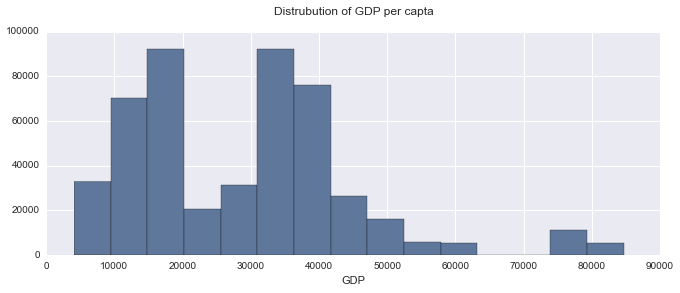

In [250]:
ax = df.perCaptaGDP.hist(bins = 15);
ax.set_title("Distrubution of GDP per capta\n");
ax.set_xlabel("GDP");

###Ok....if I classify each data point by if its country has more than 20,000 of GDP per capta.... how it relates to the Math score

In [114]:
import matplotlib.pylab as plt

In [169]:
df["test"]=None
df["test"] = df["perCaptaGDP"]>20000
df.head()

,BELONG,CNT,ESCS,OUTHOURS,PV1MATH,PV1READ,PV1SCIE,ST28Q01,STIDSTD,CNT1,perCaptaGDP,test
0,-1.18,Albania,NaN,NA,406.8469,249.5762,341.7009,0-10 books,00001,Albania,8630.994455,False
1,NA,Albania,NaN,8,486.1427,406.2936,548.9929,201-500 books,00002,Albania,8630.994455,False
2,NA,Albania,NaN,24,533.2684,401.21,499.6643,More than 500 books,00003,Albania,8630.994455,False
3,NA,Albania,NaN,17,412.2215,547.363,438.6796,11-25 books,00004,Albania,8630.994455,False
4,2.63,Albania,NaN,NA,381.9209,311.7707,361.5628,101-200 books,00005,Albania,8630.994455,False


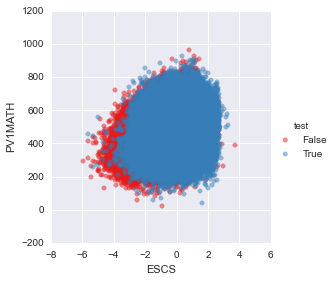

In [170]:
g = sns.FacetGrid(df, hue="test", palette="Set1", size = 4)

g = (g.map(plt.scatter, "ESCS", "PV1MATH", alpha=.5).add_legend())

it isn't good. Maybe if I plot in another way. Let's start by creating a boxplot

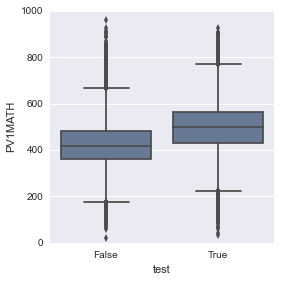

In [148]:
g = sns.FacetGrid(df, size = 4)
g.map(sns.boxplot, "test", "PV1MATH");

The box plot is showing more the scatter...I am going to classify data by their decil in relation to theirs GDPs and compare when I do the same in relation to the social indicator

In [251]:
df["gdp_bk"] = None
df["gdp_bk"]  = pd.qcut(df.perCaptaGDP, q = 5)
df.count()

BELONG         485490
CNT            485490
ESCS           473648
OUTHOURS       485490
PV1MATH        485490
PV1READ        485490
PV1SCIE        485490
ST28Q01        485490
ST57Q01        485490
STIDSTD        485490
CNT1           485490
perCaptaGDP    485197
gdp_bk         485197
dtype: int64

There are some data missing in perCaptaGDP

In [172]:
df.loc[pd.qcut(df.perCaptaGDP, q = 10).isnull()].CNT.unique()

array(['Liechtenstein'], dtype=object)

Ok, it is correct...let's plot it

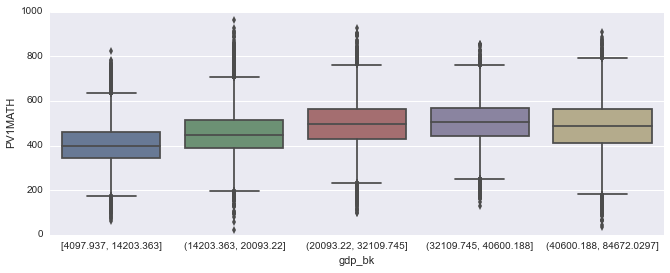

In [201]:
sns.boxplot("gdp_bk", "PV1MATH", data=df)

###Intresting...let's see regarding to the social score...


In [307]:
df.ESCS[df.ESCS=="NA"]=None
df.ESCS = df.ESCS.astype(float)
df["ESCS_bk"] = None
df["ESCS_bk"]  = pd.qcut(df.ESCS, q = 5)
df.count()

/Users/ucaiado/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


BELONG        485490
CNT           485490
ESCS          473648
OUTHOURS      485490
PV1MATH       485490
PV1READ       485490
PV1SCIE       485490
ST28Q01       485490
ST57Q01       301367
STIDSTD       485490
ST57Q01_bk    290694
ESCS_bk       473648
dtype: int64

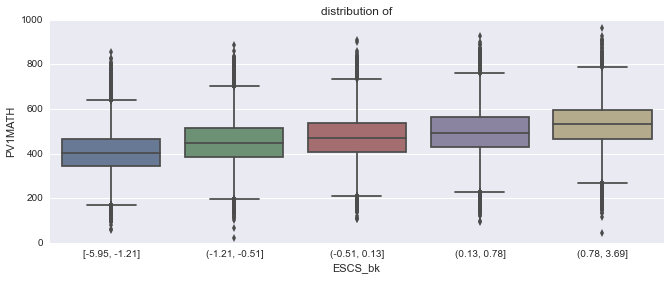

In [308]:
ax = sns.boxplot("ESCS_bk", "PV1MATH", data=df);
ax.set_title("distribution of ");

It is much more interesting...I could explore that. Let's see the box-plot of the other scores

In [204]:
df.PV1READ = df.PV1READ.astype(float)
df.PV1SCIE = df.PV1SCIE.astype(float)

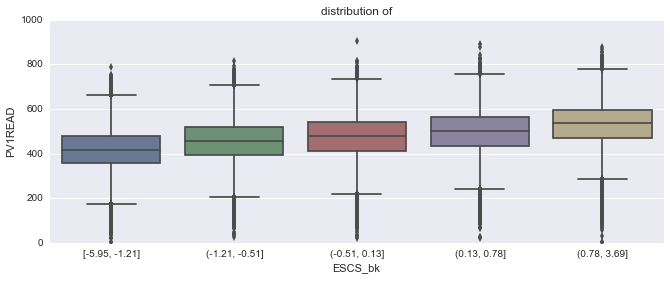

In [205]:
ax = sns.boxplot("ESCS_bk", "PV1READ", data=df);
ax.set_title("distribution of ");

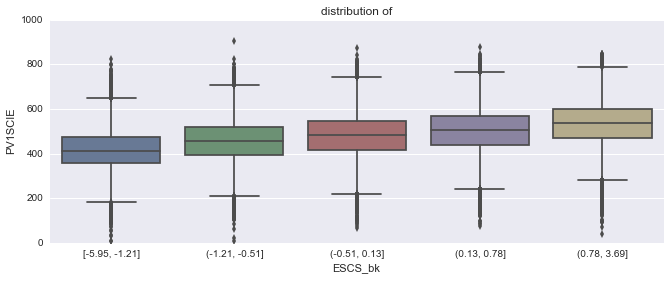

In [206]:
ax = sns.boxplot("ESCS_bk", "PV1SCIE", data=df);
ax.set_title("distribution of ");

Nice...it is consistent with all scores... 

###Ok, let me explore the others variables that I choose

In [253]:
df.BELONG[df.BELONG=="NA"]=None
df.BELONG = df.BELONG.astype(float)

/Users/ucaiado/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


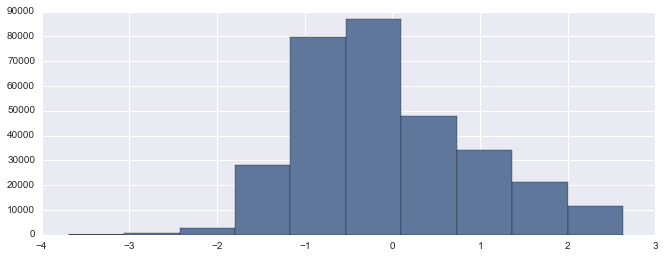

In [212]:
df.BELONG.hist()

In [254]:
df.OUTHOURS[df.OUTHOURS=="NA"]=None
df.OUTHOURS = df.OUTHOURS.astype(float)

/Users/ucaiado/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [258]:
df.count()

BELONG         313399
CNT            485490
ESCS           473648
OUTHOURS       308799
PV1MATH        485490
PV1READ        485490
PV1SCIE        485490
ST28Q01        485490
ST57Q01        301367
STIDSTD        485490
CNT1           485490
perCaptaGDP    485197
gdp_bk         485197
ESCS_bk        473648
dtype: int64

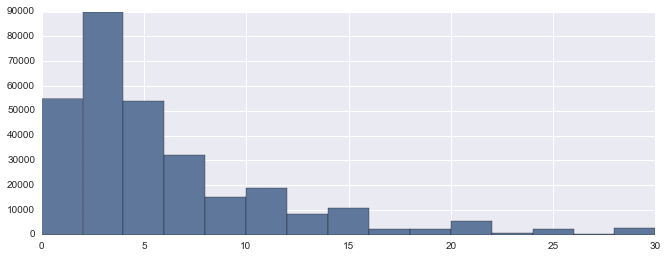

In [280]:
df.ST57Q01.hist(bins = 15)

In [295]:
df.ST57Q01.describe()

count    301367.000000
mean          5.493770
std           5.383815
min           0.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          30.000000
Name: ST57Q01, dtype: float64

In [298]:
pd.cut?

In [302]:
df["ST57Q01_bk"] = None
df["ST57Q01_bk"]  =pd.cut(df.ST57Q01, bins = [0, 2,4,5,7,8,10,12, 15, 30])

In [293]:
pd.qcut?

In [303]:
df.PV1MATH = df.PV1MATH.astype(float)

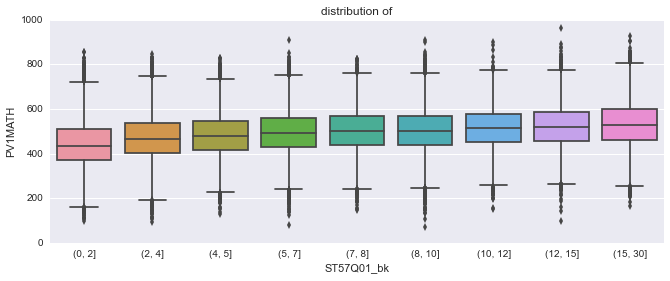

In [662]:
ax = sns.boxplot("ST57Q01_bk", "PV1MATH", data=df);
ax.set_title("distribution of ");

####Hmm....let me see the last data faceting by the social buckets

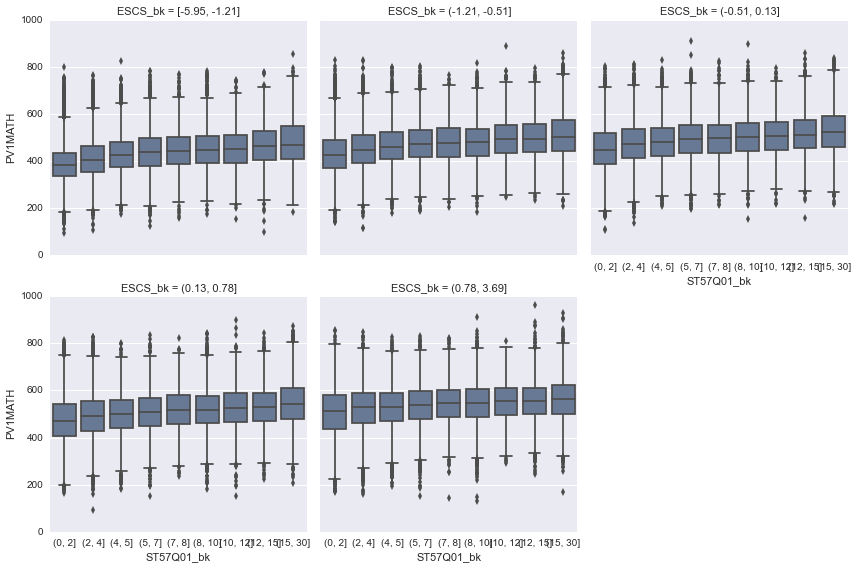

In [356]:
g = sns.FacetGrid(df, size = 4, col_wrap =3, col="ESCS_bk")
g.map(sns.boxplot, "ST57Q01_bk", "PV1MATH");

###would be nice if I could filter the data to see each bucket. Maybe by a barplot with the count on each bucket

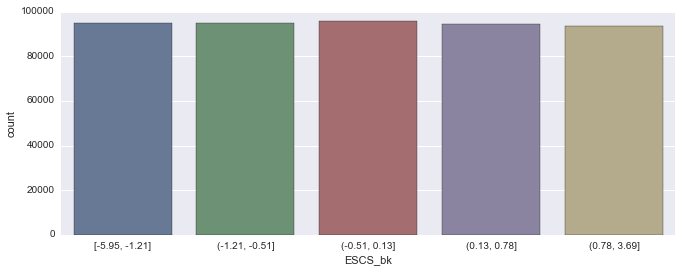

In [320]:
sns.countplot(x="ESCS_bk", data=df);

###Own....I have forgotten that I bucketize all data by its deciles. Maybe by its histogram then


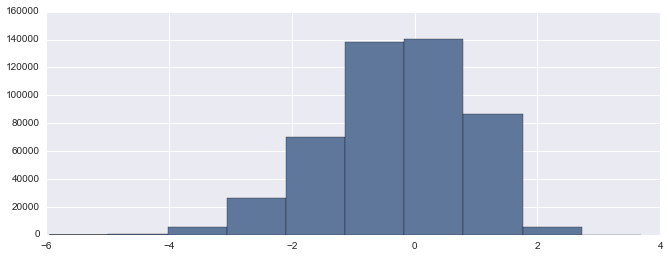

In [324]:
ax = df.ESCS.hist(bins = 10)

In [329]:
import numpy as np

In [341]:
a_bins

array([-5.95 , -4.986, -4.022, -3.058, -2.094, -1.13 , -0.166,  0.798,
        1.762,  2.726,  3.69 ])

In [361]:
a_heights, a_bins = np.histogram(df.ESCS[~df['ESCS'].isnull()], bins = 7)

In [362]:
df["ESCS_bk2"] = None
df["ESCS_bk2"] = pd.cut(df.ESCS, bins= a_bins)

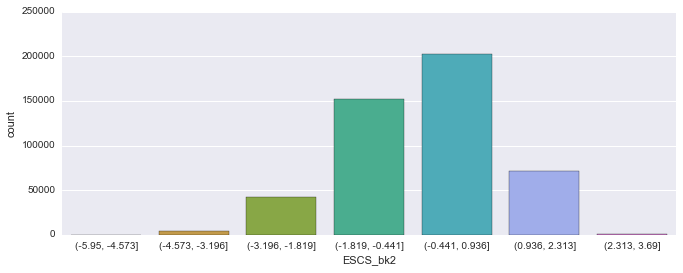

In [363]:
sns.countplot(x="ESCS_bk2", data=df);


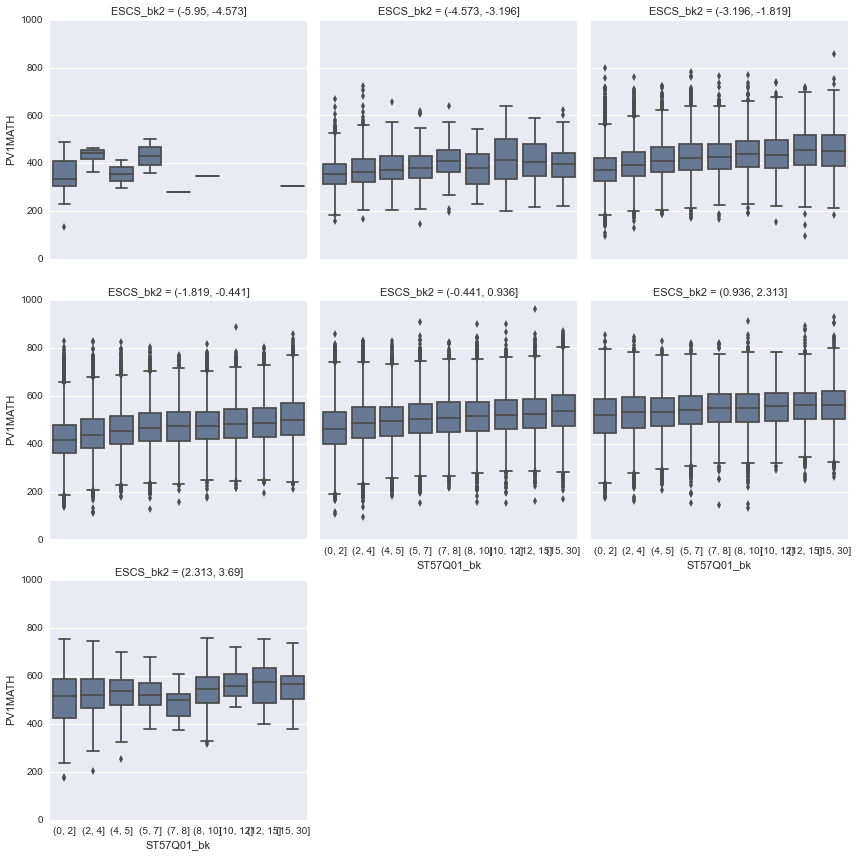

In [364]:
g = sns.FacetGrid(df, size = 4, col_wrap =3, col="ESCS_bk2")
g.map(sns.boxplot, "ST57Q01_bk", "PV1MATH");

###Nice, I also would like to plot something about each country....the average time, maybe

In [383]:
df_grouped = df.groupby("CNT1").mean()

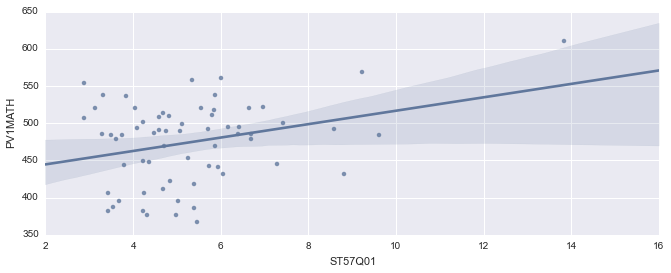

In [384]:
sns.regplot(x="ST57Q01", y="PV1MATH", data=df_grouped);

###Then, I would allow the readers to mouse ouver each point to see more data and the name of each country. Maybe I could colored the points by the countries'continent. 

In [613]:
df_continents = pd.read_csv("data/continents.csv", sep = "\t")
df_continents.index=df_continents.CNT1.values
df_continents.drop(["CNT1"], axis=1, inplace=True)

In [614]:
df_continents.head()

,CONTINENT
Albania,Europe
Argentina,South America
Australia,Oceania
Austria,Europe
Belgium,Europe


In [618]:
df_grouped["continent"] = None
df_grouped["continent"]  = df_continents.loc[df_grouped.index].values

In [619]:
df_grouped.head()

,ESCS,PV1MATH,ST57Q01,continent
CNT1,,,,
Albania,NaN,395.296185,5.026426,Europe
Argentina,-0.626649,395.402241,3.681577,South America
Australia,0.189072,492.842855,5.718562,Oceania
Austria,0.108333,507.711753,4.601316,Europe
Belgium,0.175149,519.868902,5.540794,Europe


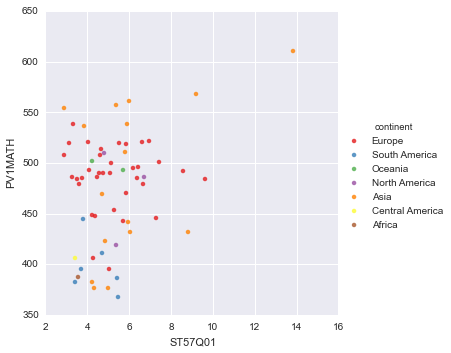

In [661]:

ax = sns.lmplot(x="ST57Q01", y="PV1MATH",hue = "continent", palette="Set1",fit_reg=False,
           data=df_grouped)


###I am not sure about the trend line....It can be painful to redraw it when the data is filtered out. One last chart before start to reshape the data to use in my visualization....I would like to use my personal data (about the time I commited to the Udacity course) as an introduction. It would be a nice introduction

importing data

In [437]:
import datetime

In [499]:
l_wk = ["SEGUNDA-FEIRA", "TERCA-FEIRA","QUARTA-FEIRA","QUINTA-FEIRA",
 "SEXTA-FEIRA","SABADO", "DOMINGO"]
l_lab = [u"JANEIRO", u"FEVEREIRO", u"MARAO", u"ABRIL", u"MAIO", u"JUNHO",
 u"JULHO", u"AGOSTO", u"SETEMBRO", u"OUTUBRO", u"NOVEMBRO", u"DEZEMBRO" ]
d_convert = dict(zip(l_lab, range(1,13)))

In [540]:
l_data=[]
with open("data/DailyTimeDetail_DataScience.csv") as fo:
    b_test  = True
    i_year=2014
    for idx, row in enumerate(fo):
        l = row.strip().split(",")
        if unidecode(l[0][1:]) in l_wk:
            i_m = d_convert[unidecode(l[1].split()[-1][:-1])]
            i_d = int(l[1].split()[0])
            if i_m==1 and b_test: 
                i_year+=1
                b_test=False
            i_y = i_year
            dt_last = datetime.datetime(i_y, i_m, i_d)
        if "Total" in l:
            d1 = datetime.datetime.strptime(l[1],'%H:%M')
            dt1 = datetime.timedelta(hours = d1.hour, minutes=d1.minute, seconds=d1.second)
            i_min = d1.hour*60 + d1.minute
            l_data.append([dt_last, dt1,i_min, l[1]]) 
            
            


/Users/ucaiado/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.
/Users/ucaiado/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


In [541]:
df_timeCommited = pd.DataFrame(l_data)
df_timeCommited.columns = ["DATE","TIME", "MINT", "ORG"]
df_timeCommited.head()

,DATE,TIME,MINT,ORG
0,2014-10-04,04:17:00,257,4:17
1,2014-10-05,00:24:00,24,0:24
2,2014-10-06,01:15:00,75,1:15
3,2014-10-10,01:06:00,66,1:06
4,2014-10-12,01:24:00,84,1:24


In [543]:
(df_timeCommited.TIME.sum()).total_seconds()/60**2

455.6666666666667

In [544]:
row

'GRAND TOTAL,455:42'

In [508]:
kw = lambda x: x.isocalendar()[1]

In [514]:
df_timeCommited["WK_IDX"] = list(df_timeCommited['DATE'].map(kw))

In [515]:
df_timeCommited.head()

,DATE,TIME,ORG,WK_IDX
0,2014-10-04,04:17:00,4:17,40
1,2014-10-05,00:24:00,0:24,40
2,2014-10-06,01:15:00,1:15,41
3,2014-10-10,01:06:00,1:06,41
4,2014-10-12,01:24:00,1:24,41


In [548]:
df_t = df_timeCommited.copy()

In [549]:
df_t.index = df_timeCommited.DATE

In [522]:
df_t.head()

,DATE,TIME,ORG,WK_IDX
DATE,,,,
2014-10-04,2014-10-04,04:17:00,4:17,40
2014-10-05,2014-10-05,00:24:00,0:24,40
2014-10-06,2014-10-06,01:15:00,1:15,41
2014-10-10,2014-10-10,01:06:00,1:06,41
2014-10-12,2014-10-12,01:24:00,1:24,41


In [551]:
df_wk = df_t.resample("W", how="sum")

In [555]:
df_wk.fillna(0, inplace=True)
df_wk/=60.

In [558]:
import matplotlib.pylab as plt

In [583]:
#When I started the NanoDegree
df_wk = df_wk.loc[df_wk.index>datetime.datetime(2014,11,10)]

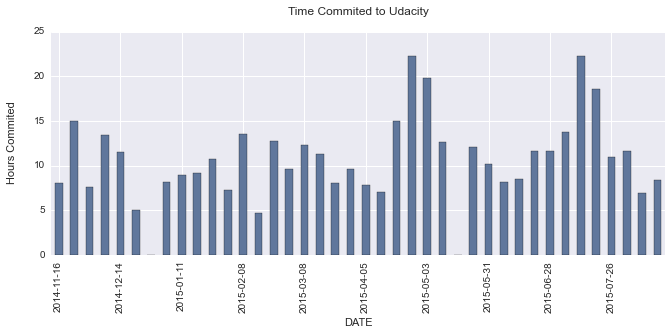

In [599]:
ax = df_wk.plot(kind = "bar")
lgd=plt.legend()
lgd.set_visible(False)
lf_ticks=plt.xticks()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [x[:10] for x in labels]
i_labelidx=np.arange(0,len(lf_ticks[0]),max(1,len(lf_ticks[0])/10))
l_labels=[labels[i] for i in i_labelidx]
plt.xticks(lf_ticks[0][np.arange(0,len(lf_ticks[0]),max(1,len(lf_ticks[0])/10))],l_labels);
ax.set_ylabel("Hours Commited\n");
ax.set_title("Time Commited to Udacity\n");

In [587]:
#number of weeks studied
df_wk.shape[0]

40

In [588]:
#average time studied
df_wk.sum()*1./df_wk.shape[0]

MINT    10.64625
dtype: float64

###Nice, I guess taht I already have enought ideas to start to make my project....well...I mean, before I need to make one last BIG thing

##Reshape the data

###I need to organize the data in a way that I can filter out what the reader want. As I will allow filter just by the Social index buckets....then, it is one of my levels.....also, I will like to plot the scatter by country....then, I also need a column with the weight of each row and a index by country...all data also need to be identifyed by continent....and finally....all data that will be uses in the boxplot

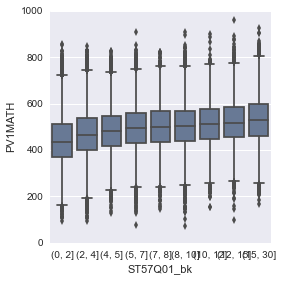

In [666]:
g = sns.FacetGrid(df, size = 4)
g.map(sns.boxplot, "ST57Q01_bk", "PV1MATH");

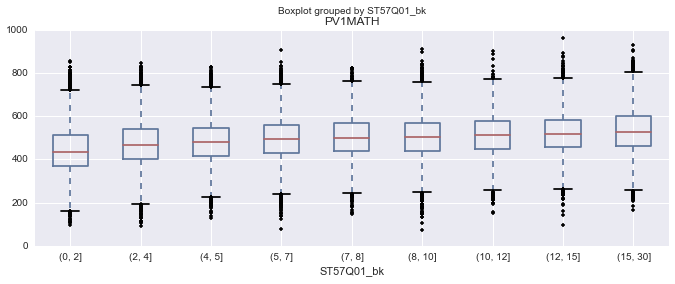

In [687]:
x = df.boxplot(by="ST57Q01_bk", column="PV1MATH", sym="k.", return_type = "dict")

In [673]:
df.boxplot?

In [696]:
y = x["PV1MATH"]["whiskers"][0]

In [698]:
y.get_path()

Path(array([[   1.    ,  371.7168],
       [   1.    ,  161.6373]]), None)

In [700]:
df.head()

,BELONG,CNT,ESCS,OUTHOURS,PV1MATH,PV1READ,PV1SCIE,ST28Q01,ST57Q01,STIDSTD,ST57Q01_bk,ESCS_bk,ESCS_bk2,CNT1
0,-1.18,Albania,NaN,NA,406.8469,249.5762,341.7009,0-10 books,NaN,00001,NaN,NaN,NaN,Albania
1,NA,Albania,NaN,8,486.1427,406.2936,548.9929,201-500 books,NaN,00002,NaN,NaN,NaN,Albania
2,NA,Albania,NaN,24,533.2684,401.21,499.6643,More than 500 books,NaN,00003,NaN,NaN,NaN,Albania
3,NA,Albania,NaN,17,412.2215,547.363,438.6796,11-25 books,10,00004,"(8, 10]",NaN,NaN,Albania
4,2.63,Albania,NaN,NA,381.9209,311.7707,361.5628,101-200 books,NaN,00005,NaN,NaN,NaN,Albania


In [701]:
df2 = df.copy()
df2.drop(["BELONG", "OUTHOURS", "PV1READ", "PV1SCIE", "ST28Q01", "STIDSTD"], axis=1, inplace = True)

In [702]:
df2.shape

(485490, 8)

In [704]:
df2.drop(["CNT"], axis=1, inplace = True)

In [710]:
df2.drop(df2[df2.isnull().sum(axis=1)>0].index, inplace=True)

In [712]:
df2.shape

(287265, 7)

In [711]:
df2.head()

,ESCS,PV1MATH,ST57Q01,ST57Q01_bk,ESCS_bk,ESCS_bk2,CNT1
4748,0.25,223.0955,1,"(0, 2]","(0.13, 0.78]","(-0.441, 0.936]",UAE
4753,-0.95,379.5840,1,"(0, 2]","(-1.21, -0.51]","(-1.819, -0.441]",UAE
4754,0.40,384.3356,5,"(4, 5]","(0.13, 0.78]","(-0.441, 0.936]",UAE
4755,0.74,405.9121,20,"(15, 30]","(0.13, 0.78]","(-0.441, 0.936]",UAE
4756,0.38,473.9913,4,"(2, 4]","(0.13, 0.78]","(-0.441, 0.936]",UAE


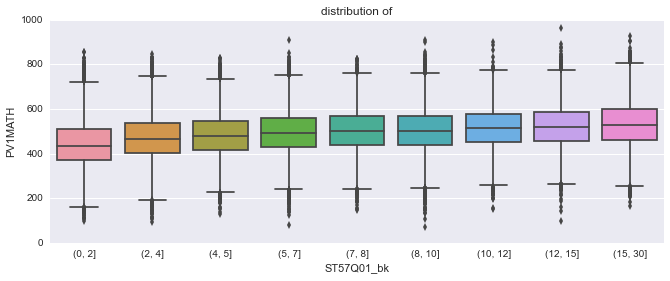

In [713]:
ax = sns.boxplot("ST57Q01_bk", "PV1MATH", data=df);
ax.set_title("distribution of ");

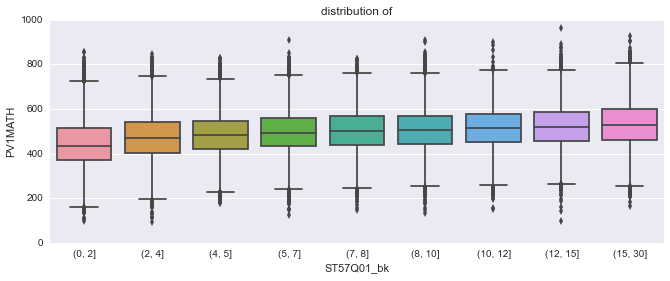

In [714]:
ax = sns.boxplot("ST57Q01_bk", "PV1MATH", data=df2);
ax.set_title("distribution of ");

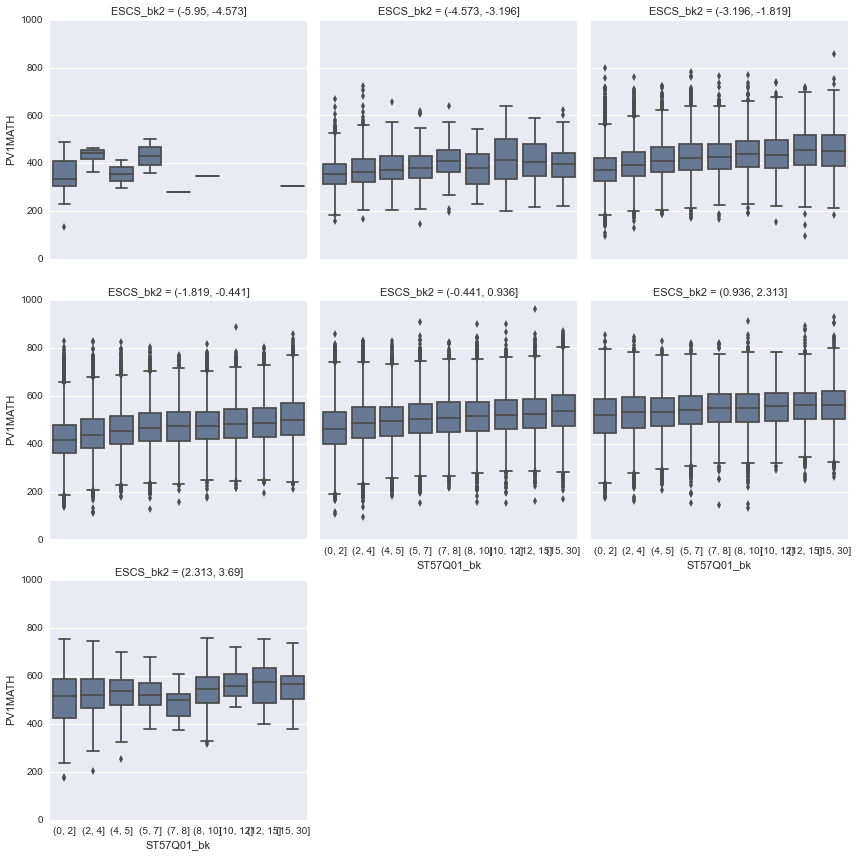

In [718]:
g = sns.FacetGrid(df2, size = 4, col_wrap =3, col="ESCS_bk2")
g.map(sns.boxplot, "ST57Q01_bk", "PV1MATH");

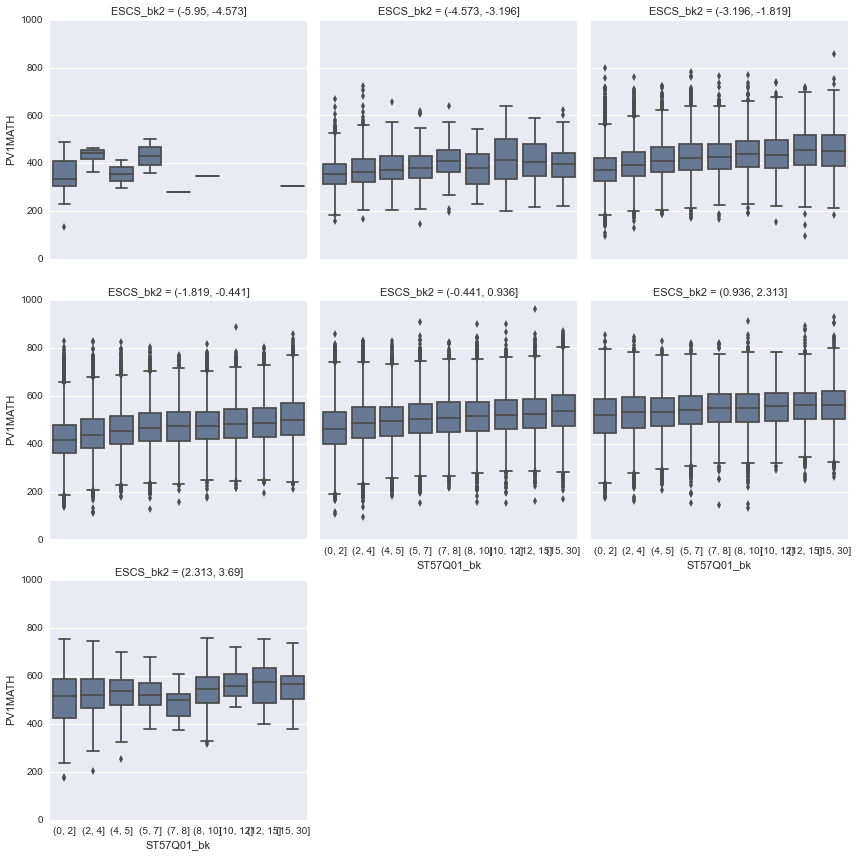

In [717]:
g = sns.FacetGrid(df, size = 4, col_wrap =3, col="ESCS_bk2")
g.map(sns.boxplot, "ST57Q01_bk", "PV1MATH");

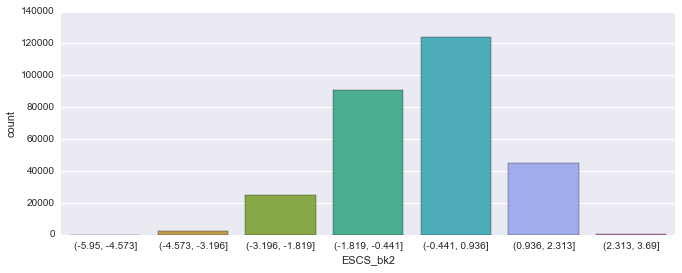

In [721]:
sns.countplot(x="ESCS_bk2", data=df2);

In [719]:
df2.shape

(287265, 7)

###I don't know....287,000 rows to handle and plot come just is a problem in D3??? I will test that. Would be simple to use all data then to pre-calculate all decils and so on

In [502]:
%matplotlib inline
from IPython.core.display import HTML


def css_styling():
    styles = open("css/ipython2.css", "r").read()
    return HTML(styles)

css_styling()

In [598]:
import seaborn as sns
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (11, 4)})
sns.set_style("darkgrid")